In [4]:
import numpy as np 
import pandas as pd

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
SPY_2DAY = pd.read_csv('/Users/akumaar/Stock-Densities/E-mini S&P 500 minute data (2 days).csv')

In [6]:
SPY_2DAY

,Symbol: ESH22,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Study: VOL,Unnamed: 7
0,Date Time,Open,High,Low,Close,Change,Volume,Open Interest
1,2022-02-09 07:14:00,4555.5,4556,4555.25,4555.75,0,365,NaN
2,2022-02-09 07:15:00,4555.5,4556.75,4555,4556.5,0.75,426,NaN
3,2022-02-09 07:16:00,4556.5,4556.5,4556,4556,-0.5,435,NaN
4,2022-02-09 07:17:00,4556,4556.75,4555.75,4556.25,0.25,412,NaN
...,...,...,...,...,...,...,...,...
1917,2022-02-10 17:10:00,4491.25,4493.25,4491.25,4493,2,160,NaN
1918,2022-02-10 17:11:00,4493.25,4494.75,4493,4493.25,0.25,295,NaN
1919,2022-02-10 17:12:00,4493.25,4495,4493,4494.25,1,184,NaN
1920,2022-02-10 17:13:00,4494.5,4495.25,4494.5,4494.75,0.5,185,NaN


In [11]:
def load_data():
    df = pd.read_csv(
        '/Users/akumaar/Stock-Densities/E-mini S&P 500 minute data (2 days).csv', header=1)
    cols = ["Date Time", "Close"]
    data = df[cols]
    data = data.set_axis(["timestamp", "close"], axis=1)
    return data


def deltas():
    df = load_data()
    df["log"] = np.log(df["close"].astype(float))
    df["deltas"] = df["log"].diff()
    df.dropna(inplace=True)
    final_data = df[["timestamp", "close", "deltas"]]
    #final_data = final_data.set_axis(["timestamp", "close", "deltas"], axis=1)
    return final_data

In [12]:
data = load_data()

In [14]:
data = deltas()

In [15]:
data

,timestamp,close,deltas
1,2022-02-09 07:15:00,4556.50,0.000165
2,2022-02-09 07:16:00,4556.00,-0.000110
3,2022-02-09 07:17:00,4556.25,0.000055
4,2022-02-09 07:18:00,4555.75,-0.000110
5,2022-02-09 07:19:00,4555.25,-0.000110
...,...,...,...
1915,2022-02-10 17:09:00,4491.00,-0.000612
1916,2022-02-10 17:10:00,4493.00,0.000445
1917,2022-02-10 17:11:00,4493.25,0.000056
1918,2022-02-10 17:12:00,4494.25,0.000223


In [16]:
df_temp = data
p = 10
  #Generating the lagged p terms
for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['close'].shift(i)


In [17]:
df_temp

,timestamp,close,deltas,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10
1,2022-02-09 07:15:00,4556.50,0.000165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-09 07:16:00,4556.00,-0.000110,4556.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-09 07:17:00,4556.25,0.000055,4556.00,4556.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-09 07:18:00,4555.75,-0.000110,4556.25,4556.00,4556.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-02-09 07:19:00,4555.25,-0.000110,4555.75,4556.25,4556.00,4556.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2022-02-10 17:09:00,4491.00,-0.000612,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00,4495.00
1916,2022-02-10 17:10:00,4493.00,0.000445,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00
1917,2022-02-10 17:11:00,4493.25,0.000056,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25
1918,2022-02-10 17:12:00,4494.25,0.000223,4493.25,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75


In [25]:
train_size = (int)(0.8 * df_temp.shape[0])
df_train = pd.DataFrame(df_temp[0:train_size])
df_test = pd.DataFrame(df_temp[train_size:data.shape[0]])
df_train_2 = df_train.dropna()
#X contains the lagged values ,hence we skip the first column
X_train = df_train_2.iloc[:,3:].values.reshape(-1,p)
#Y contains the value,it is the first column
y_train = df_train_2.iloc[:,1].values.reshape(-1,1)

In [26]:
X_train

array([[4555.  , 4555.75, 4556.25, ..., 4556.25, 4556.  , 4556.5 ],
       [4555.  , 4555.  , 4555.75, ..., 4555.75, 4556.25, 4556.  ],
       [4555.5 , 4555.  , 4555.  , ..., 4555.25, 4555.75, 4556.25],
       ...,
       [4572.  , 4573.75, 4577.5 , ..., 4578.25, 4574.5 , 4569.5 ],
       [4574.  , 4572.  , 4573.75, ..., 4578.5 , 4578.25, 4574.5 ],
       [4575.  , 4574.  , 4572.  , ..., 4579.75, 4578.5 , 4578.25]])

In [27]:
y_train

array([[4555.  ],
       [4555.5 ],
       [4555.25],
       ...,
       [4574.  ],
       [4575.  ],
       [4577.5 ]])

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

theta  = lr.coef_.T
intercept = lr.intercept_
df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_

<ipython-input-28-f564115268a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


In [31]:
df_test

,timestamp,close,deltas,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10
1536,2022-02-10 09:50:00,4567.25,-0.002242,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75,4578.50
1537,2022-02-10 09:51:00,4565.50,-0.000383,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75
1538,2022-02-10 09:52:00,4564.75,-0.000164,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00
1539,2022-02-10 09:53:00,4564.00,-0.000164,4564.75,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75
1540,2022-02-10 09:54:00,4561.75,-0.000493,4564.00,4564.75,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2022-02-10 17:09:00,4491.00,-0.000612,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00,4495.00
1916,2022-02-10 17:10:00,4493.00,0.000445,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00
1917,2022-02-10 17:11:00,4493.25,0.000056,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25
1918,2022-02-10 17:12:00,4494.25,0.000223,4493.25,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75


In [32]:
X_test = df_test.iloc[:,3:].values.reshape(-1,p)
df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_

In [33]:
df_test

,timestamp,close,deltas,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10,Predicted_Values
1536,2022-02-10 09:50:00,4567.25,-0.002242,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75,4578.50,4578.016773
1537,2022-02-10 09:51:00,4565.50,-0.000383,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75,4566.604365
1538,2022-02-10 09:52:00,4564.75,-0.000164,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4565.513306
1539,2022-02-10 09:53:00,4564.00,-0.000164,4564.75,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4577.75,4563.456357
1540,2022-02-10 09:54:00,4561.75,-0.000493,4564.00,4564.75,4565.50,4567.25,4577.50,4575.00,4574.00,4572.00,4573.75,4577.50,4563.701312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2022-02-10 17:09:00,4491.00,-0.000612,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00,4495.00,4494.192821
1916,2022-02-10 17:10:00,4493.00,0.000445,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.00,4491.379195
1917,2022-02-10 17:11:00,4493.25,0.000056,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4490.25,4493.932970
1918,2022-02-10 17:12:00,4494.25,0.000223,4493.25,4493.00,4491.00,4493.75,4494.50,4494.75,4492.50,4492.50,4493.25,4492.75,4493.534860


In [36]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(df_test['close'], df_test['Predicted_Values']))
print("The RMSE is :", RMSE,", Value of p : ",p)

The RMSE is : 2.6925082668912967 , Value of p :  10


In [60]:
df_c = pd.concat([df_train_2,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.close - df_c.Predicted_Values

In [59]:
df_train_2

,timestamp,close,deltas,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10,Predicted_Values
11,2022-02-09 07:25:00,4555.00,0.000000,4555.00,4555.75,4556.25,4556.50,4556.00,4555.25,4555.75,4556.25,4556.00,4556.50,4555.073221
12,2022-02-09 07:26:00,4555.50,0.000110,4555.00,4555.00,4555.75,4556.25,4556.50,4556.00,4555.25,4555.75,4556.25,4556.00,4555.025411
13,2022-02-09 07:27:00,4555.25,-0.000055,4555.50,4555.00,4555.00,4555.75,4556.25,4556.50,4556.00,4555.25,4555.75,4556.25,4555.502947
14,2022-02-09 07:28:00,4555.50,0.000055,4555.25,4555.50,4555.00,4555.00,4555.75,4556.25,4556.50,4556.00,4555.25,4555.75,4555.384531
15,2022-02-09 07:29:00,4555.00,-0.000110,4555.50,4555.25,4555.50,4555.00,4555.00,4555.75,4556.25,4556.50,4556.00,4555.25,4555.771230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2022-02-10 09:45:00,4573.75,-0.000820,4577.50,4577.75,4581.00,4579.75,4578.50,4578.25,4574.50,4569.50,4568.25,4569.00,4577.061183
1532,2022-02-10 09:46:00,4572.00,-0.000383,4573.75,4577.50,4577.75,4581.00,4579.75,4578.50,4578.25,4574.50,4569.50,4568.25,4573.272580
1533,2022-02-10 09:47:00,4574.00,0.000437,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75,4578.50,4578.25,4574.50,4569.50,4572.131875
1534,2022-02-10 09:48:00,4575.00,0.000219,4574.00,4572.00,4573.75,4577.50,4577.75,4581.00,4579.75,4578.50,4578.25,4574.50,4573.776965


In [75]:
q = 10
for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)
res = res.dropna()

In [76]:
train_size = (int)(0.8 * res.shape[0])

res_train = pd.DataFrame(res[0:train_size])
res_test = pd.DataFrame(res[train_size:res.shape[0]])

res_train_2 = res_train.dropna()
X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

theta  = lr.coef_.T
intercept = lr.intercept_
res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


<AxesSubplot:>

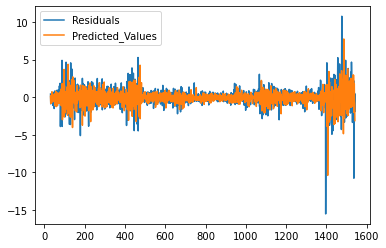

In [80]:

res_train_3[['Residuals','Predicted_Values']].plot()

In [79]:
res_train_3 = res_train_2
res_train_3.Predicted_Values = res_train_2.Predicted_Values * 10

<AxesSubplot:>

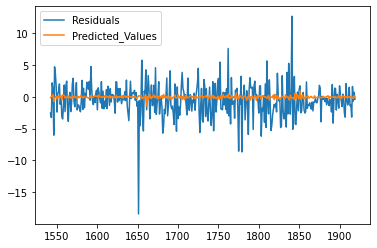

In [81]:
X_test = res_test.iloc[:,1:].values.reshape(-1,q)
res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
res_test[['Residuals','Predicted_Values']].plot()

In [82]:
RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))
print("The RMSE is :", RMSE,", Value of q : ",q)

The RMSE is : 2.6378891218600318 , Value of q :  10


,Residuals,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10
31,0.421310,0.186817,-0.620377,1.088238,0.135538,0.711859,-1.286636,-0.106703,0.177868,-1.238406,0.074452
32,-0.877178,0.421310,0.186817,-0.620377,1.088238,0.135538,0.711859,-1.286636,-0.106703,0.177868,-1.238406
33,-0.528100,-0.877178,0.421310,0.186817,-0.620377,1.088238,0.135538,0.711859,-1.286636,-0.106703,0.177868
34,0.001668,-0.528100,-0.877178,0.421310,0.186817,-0.620377,1.088238,0.135538,0.711859,-1.286636,-0.106703
35,0.168318,0.001668,-0.528100,-0.877178,0.421310,0.186817,-0.620377,1.088238,0.135538,0.711859,-1.286636
...,...,...,...,...,...,...,...,...,...,...,...
1915,-3.192821,-1.225887,-1.403658,1.499663,-0.759120,-1.276206,-0.344880,2.070050,-3.202219,-2.579175,-0.347913
1916,1.620805,-3.192821,-1.225887,-1.403658,1.499663,-0.759120,-1.276206,-0.344880,2.070050,-3.202219,-2.579175
1917,-0.682970,1.620805,-3.192821,-1.225887,-1.403658,1.499663,-0.759120,-1.276206,-0.344880,2.070050,-3.202219
1918,0.715140,-0.682970,1.620805,-3.192821,-1.225887,-1.403658,1.499663,-0.759120,-1.276206,-0.344880,2.070050


In [88]:
#checking if data is stationary
df_testing = pd.DataFrame(np.log(data.close).diff().diff(12))
adf_check(df_testing.close.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.640431015771668
p-value : 1.6364587817462715e-29
Number of Lags Used : 23
Number of Observations Used : 1882
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [85]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")